In [ ]:
!pip install tensorflow pydot graphviz


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


Understanding neural networks fundamentally requires understanding the architecture (layers, units), the flow of data (forward pass), and the optimization (backward pass or backpropagation). Below is a simple implementation of a feedforward neural network using TensorFlow 2.x and its Graph feature for visualization:

**Create a Simple Neural Network:
We will build a neural network with one hidden layer for illustrative purposes.**

Generate Some Dummy Data:
For illustration, let's generate some dummy data.

In [ ]:

data = np.random.random((1000, 5))
labels = np.random.randint(2, size=(1000, 1))

Step 3: Create a Neural Network Model
We'll create a simple feedforward neural network:

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(5,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


Step 4: Compile and Train the Model using Different Loss Functions
We'll use different loss functions like binary_crossentropy, hinge, and squared_hinge.   https://machinelearningmastery.com/loss-functions-in-tensorflow/


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def schedule(epoch, lr=.1):
    if epoch < 30:
        return lr
    else:
        return lr *.01

scheduler = LearningRateScheduler(schedule)
loss_functions = ['binary_crossentropy', 'hinge', 'mean_squared_error']
histories = {}

for loss in loss_functions:
    model = create_model()
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    history=model.fit(data, labels, epochs=100, callbacks=[scheduler])
    history = model.fit(data, labels, epochs=200, validation_split=0.2, verbose=0)
    histories[loss] = history


Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.7016 - accuracy: 0.5050 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.4880 - lr: 0.0010
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.5010 - lr: 0.0010
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5150 - lr: 0.0010
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.5150 - lr: 0.0010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5300 - lr: 0.0010
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4800 - lr: 0.0010
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5150 - lr: 0.0010
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5200 - lr:

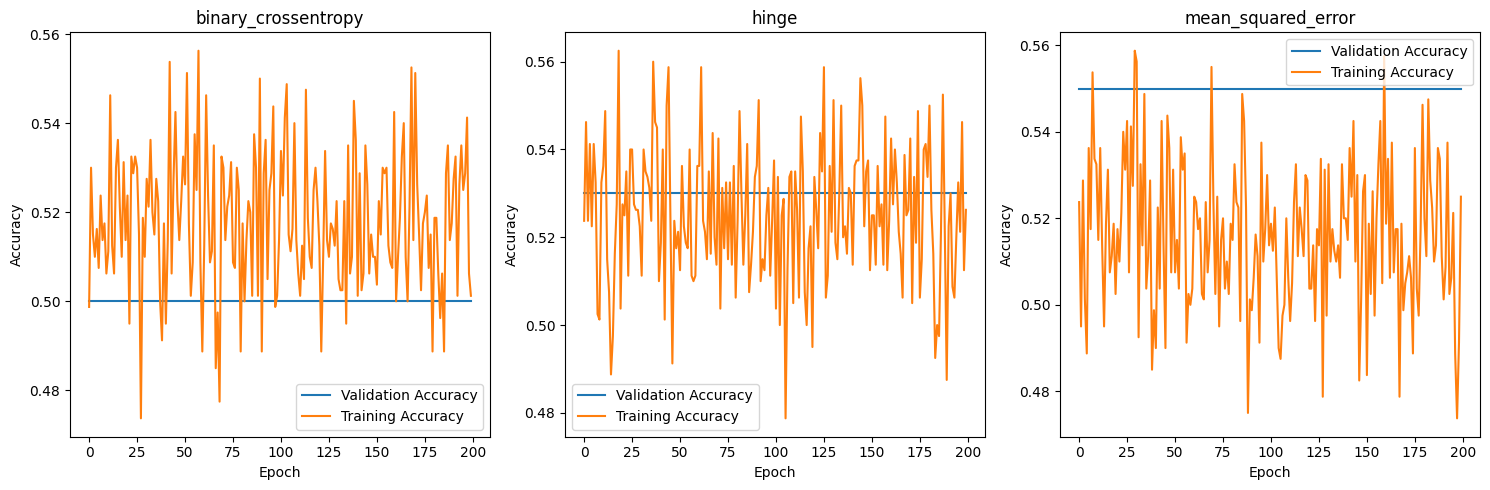

In [ ]:
plt.figure(figsize=(15, 5))

for i, (loss, history) in enumerate(histories.items()):
    plt.subplot(1, 3, i+1)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title(loss)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.7096 - accuracy: 0.4990 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5210 - lr: 0.0010
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.4910 - lr: 0.0010
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5190 - lr: 0.0010
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5220 - lr: 0.0010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.4920 - lr: 0.0010
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5330 - lr: 0.0010
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5160 - lr: 0.0010
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4990 - lr:

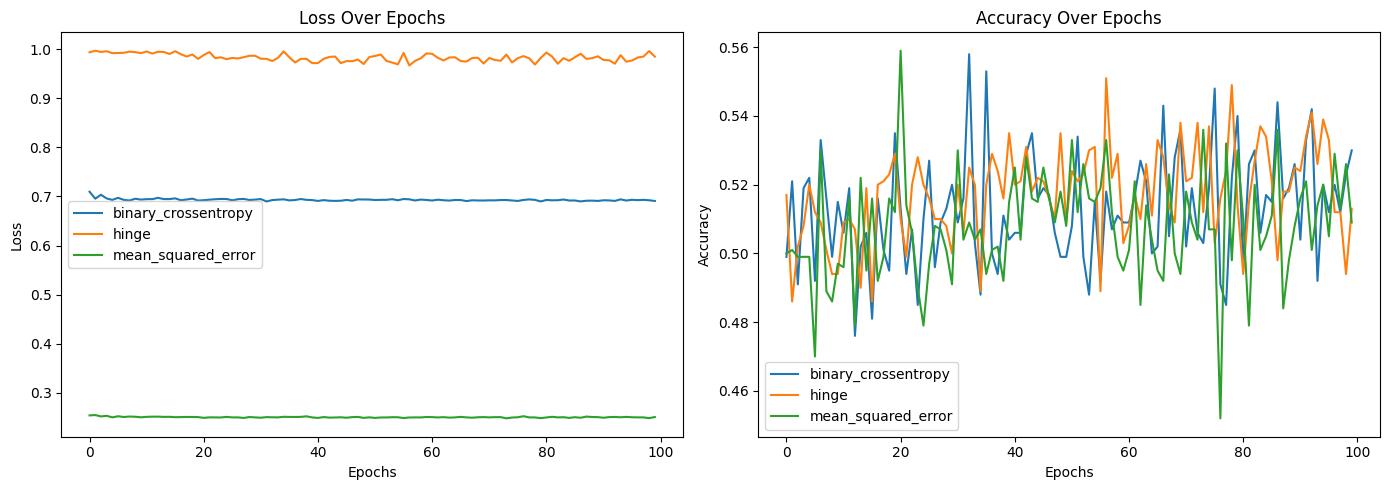

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential  # Assuming you use Sequential API for `create_model()`
# Add more imports if needed for your `create_model()` function.

# Assuming you already have a function called `create_model()` and the datasets `data` and `labels`.

def schedule(epoch, lr=.1):
    if epoch < 30:
        return lr
    else:
        return lr *.01

scheduler = LearningRateScheduler(schedule)
loss_functions = ['binary_crossentropy', 'hinge', 'mean_squared_error']
histories = {}

for loss in loss_functions:
    model = create_model()
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    history = model.fit(data, labels, epochs=100, callbacks=[scheduler])

    histories[loss] = history

# Function to plot the histories
def plot_history(histories):
    plt.figure(figsize=(14, 5))

    # Plot losses
    plt.subplot(1, 2, 1)
    for loss, history in histories.items():
        plt.plot(history.history['loss'], label=loss)
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    for loss, history in histories.items():
        plt.plot(history.history['accuracy'], label=loss)
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to visualize the histories
plot_history(histories)


Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 0.6902 - accuracy: 0.5170 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6979 - accuracy: 0.4910 - lr: 0.0010
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.4890 - lr: 0.0010
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6972 - accuracy: 0.4980 - lr: 0.0010
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5050 - lr: 0.0010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4870 - lr: 0.0010
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4910 - lr: 0.0010
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5280 - lr: 0.0010
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5300 - lr:

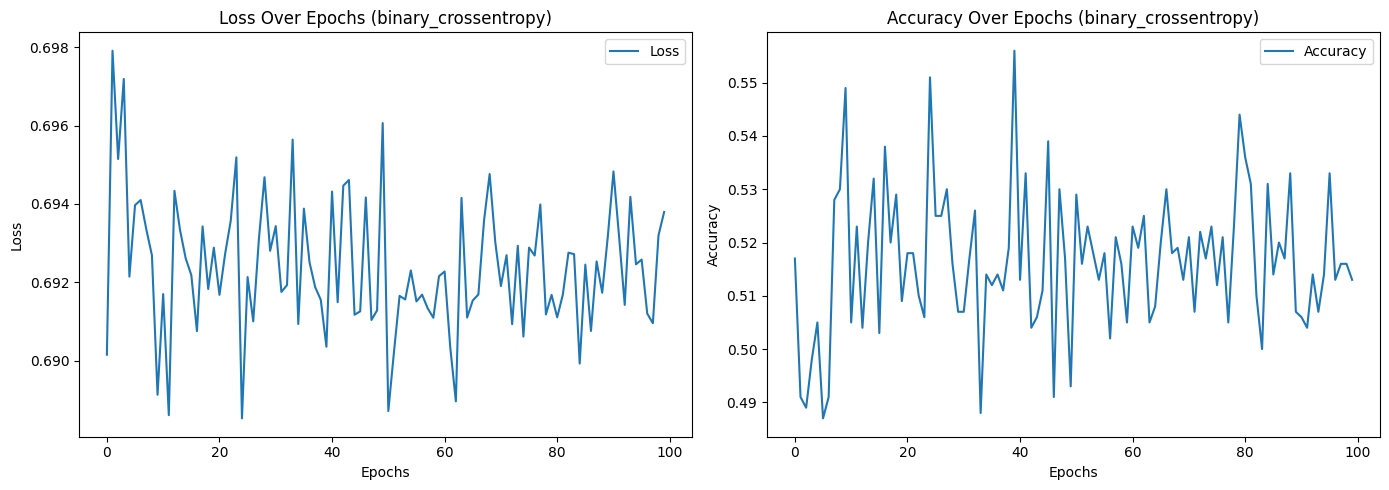

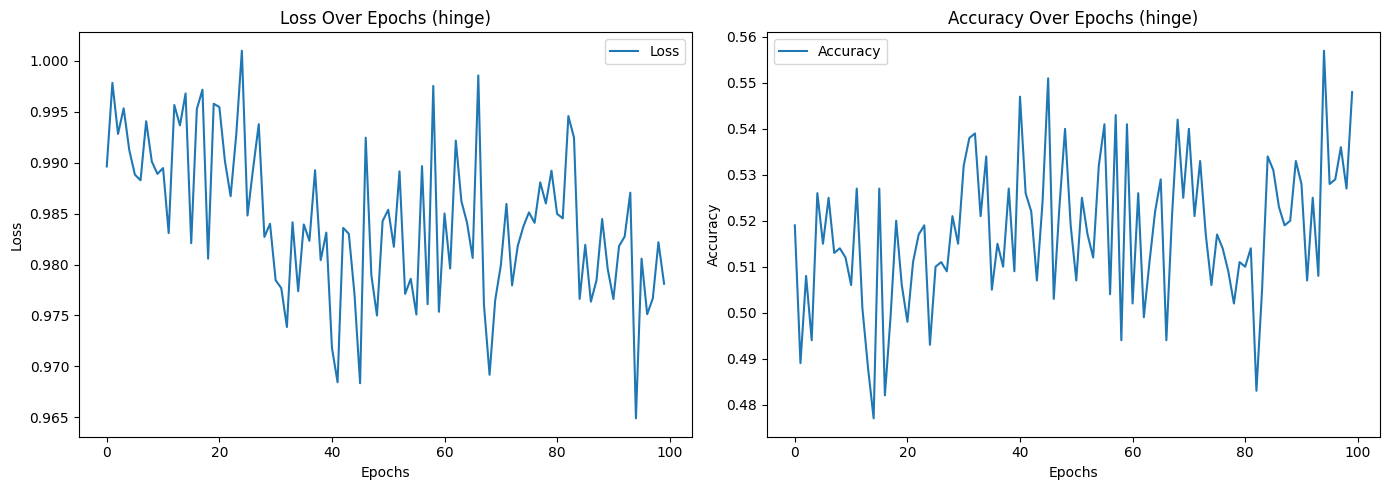

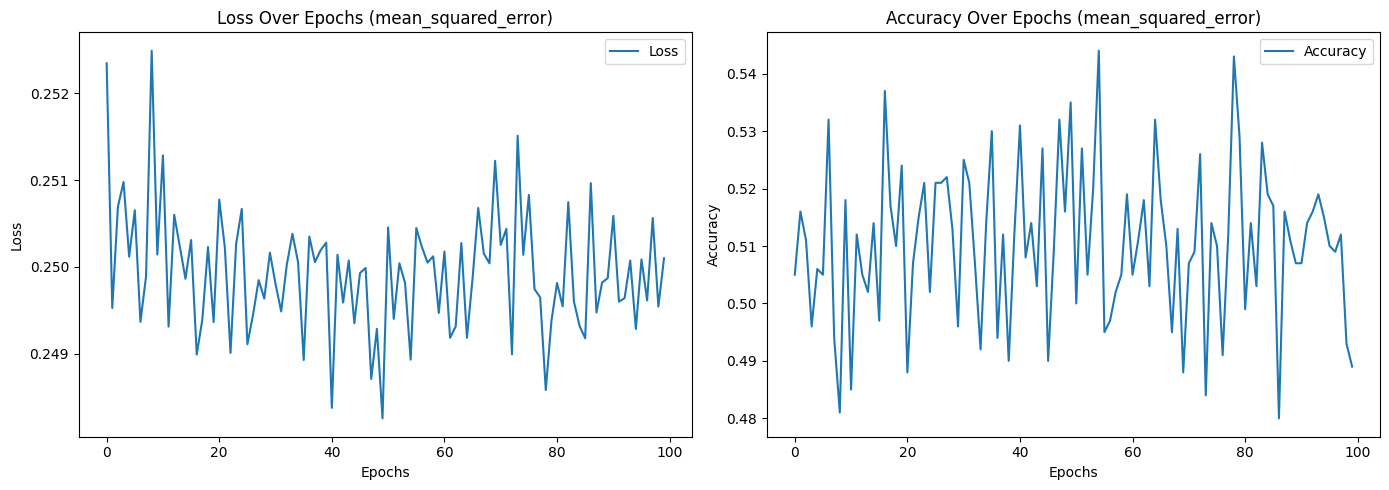

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential  # Assuming you use Sequential API for `create_model()`
# Add more imports if needed for your `create_model()` function.

# Assuming you already have a function called `create_model()` and the datasets `data` and `labels`.

def schedule(epoch, lr=.1):
    if epoch < 30:
        return lr
    else:
        return lr *.01

scheduler = LearningRateScheduler(schedule)
loss_functions = ['binary_crossentropy', 'hinge', 'mean_squared_error']
histories = {}

for loss in loss_functions:
    model = create_model()
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    history = model.fit(data, labels, epochs=100, callbacks=[scheduler])

    histories[loss] = history

# Function to plot the histories
def plot_history(histories):
    # This will create a separate plot for each loss function
    for loss, history in histories.items():
        plt.figure(figsize=(14, 5))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Loss')
        plt.title(f'Loss Over Epochs ({loss})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Accuracy')
        plt.title(f'Accuracy Over Epochs ({loss})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Call the function to visualize the histories
plot_history(histories)
